The columns "TV", "radio" and "newspaper" are in `1000$` and the column "sales" is in `million$`

**Importing necessary libraries**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split

**Importing the dataset**

In [2]:
# Units of TV,radio and newspaper are given in thousand dollar and sales is given in million dollar
df = pd.read_csv('advertising_data.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,NaN,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,NaN,58.4,12.9


In [3]:
df = pd.read_csv('advertising_data.csv', index_col=0)
df.reset_index(drop=True, inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,NaN,9.3
3,151.5,41.3,58.5,18.5
4,180.8,NaN,58.4,12.9


### EDA

We are not going into the details of the EDA process.

In [4]:
df.describe()

,TV,radio,newspaper,sales
count,180.000000,180.000000,180.000000,200.000000
mean,147.947778,23.492222,31.132778,14.022500
std,85.478690,14.980850,22.129098,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,75.300000,9.975000,13.050000,10.375000
50%,148.500000,22.900000,26.050000,12.900000
75%,218.825000,36.900000,45.375000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.shape # 200 rows and 4 columns

(200, 4)

In [6]:
df.isna().sum()

TV           20
radio        20
newspaper    20
sales         0
dtype: int64

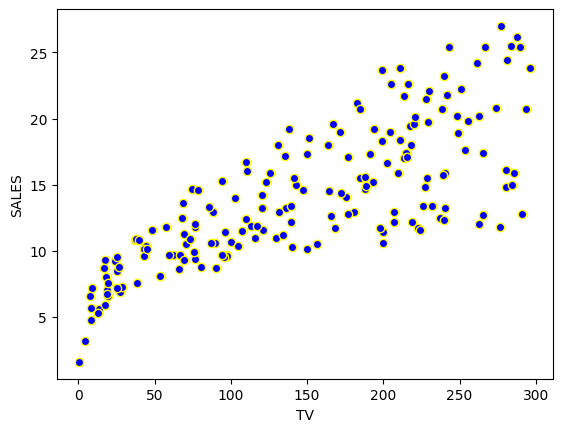

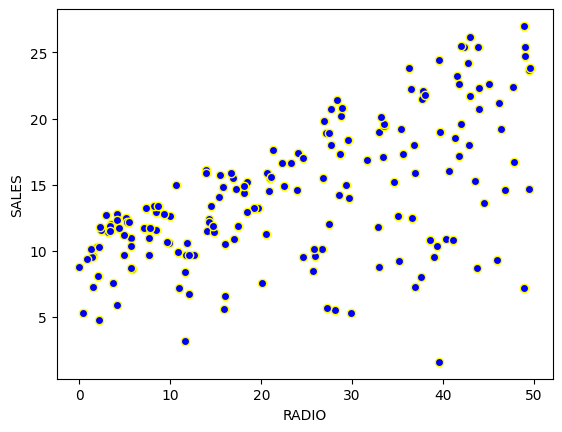

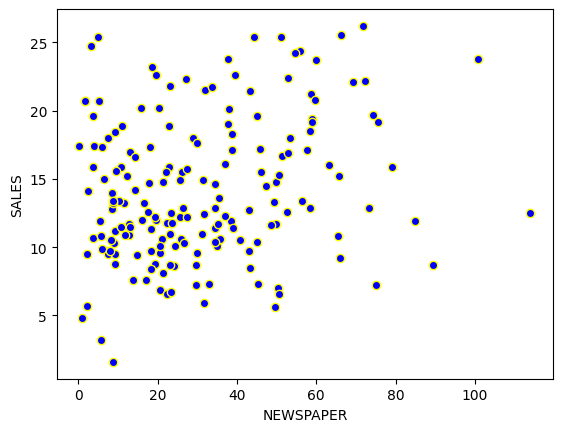

In [7]:

plt.scatter(df['TV'],df['sales'],color='blue',edgecolors='yellow',marker='o',alpha=1)
plt.xlabel('TV')
plt.ylabel("SALES")
plt.show()

plt.scatter(df['radio'],df['sales'],color='blue',edgecolors='yellow',marker='o',alpha=1)
plt.xlabel("RADIO")
plt.ylabel("SALES")
plt.show()


plt.scatter(df['newspaper'],df['sales'],color='blue',edgecolors='yellow',marker='o',alpha=1)
plt.xlabel("NEWSPAPER")
plt.ylabel("SALES")
plt.show()

In [8]:
df.sales.min(), df.sales.max()

(np.float64(1.6), np.float64(27.0))

### Model Training

In [12]:
feature_cols = ['TV','radio','newspaper']
X = df[feature_cols]
y = df.sales

In [16]:
# Step 1: Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Step 2: Define preprocessing steps for numeric columns
numeric_features = X_train.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Missing value imputation
    ('scaler', StandardScaler())                 # Standardization
])

# Step 3: Use ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

# Step 4: Create a pipeline with Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 5: Set up GridSearchCV for hyperparameter tuning
param_grid = {
    'regressor__fit_intercept': [True, False]  # Hyperparameter to tune
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',  # Use R-squared as the evaluation metric
    cv=5,  # Perform cross-validation on training data
    verbose=2
)

# Step 6: Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Step 7: Display the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ......................regressor__fit_intercept=True; total time=   0.0s
[CV] END ......................regressor__fit_intercept=True; total time=   0.0s
[CV] END ......................regressor__fit_intercept=True; total time=   0.0s
[CV] END ......................regressor__fit_intercept=True; total time=   0.0s
[CV] END ......................regressor__fit_intercept=True; total time=   0.0s
[CV] END .....................regressor__fit_intercept=False; total time=   0.0s
[CV] END .....................regressor__fit_intercept=False; total time=   0.0s
[CV] END .....................regressor__fit_intercept=False; total time=   0.0s
[CV] END .....................regressor__fit_intercept=False; total time=   0.0s
[CV] END .....................regressor__fit_intercept=False; total time=   0.0s
Best Parameters: {'regressor__fit_intercept': True}
Best Cross-Validation Score: 0.851553876153271


**Final Model Training**

In [18]:
# Step 8: Train the best model on the entire training data
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Step 9: Evaluate the model on the test set
test_score = best_model.score(X_test, y_test)
print("Test Set Score (R^2):", test_score)

Test Set Score (R^2): 0.5418643684883695
